In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:


#load the data set and split in training and testing
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:


#normalization of the data
x_train=x_train/255.
x_test=x_test/255.

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

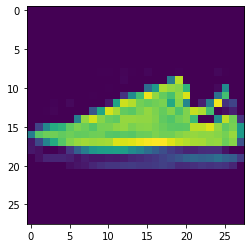

In [5]:
plt.imshow(x_train[6])

In [6]:
# size of the latent spaces is vector
latent_dim = 64     
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()     #function
    self.latent_dim = latent_dim   
    
    self.encoder = keras.Sequential([
      keras.layers.Flatten(),
      keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = keras.Sequential([
      keras.layers.Dense(784, activation='sigmoid'),
      keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [7]:
#compile the model
autoencoder.compile(optimizer='adam',
                    loss = 'mse')   #mean squared error
                   
                   
#train
autoencoder.fit(x_train, x_train,validation_data=(x_test, x_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

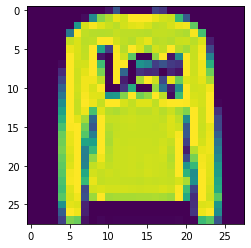

In [8]:

e_imgs = autoencoder.encoder(x_test).numpy() #encoded image convert into array
d_imgs = autoencoder.decoder(e_imgs).numpy()

plt.imshow(x_test[1])

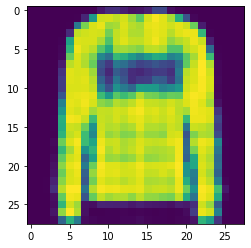

In [9]:
plt.imshow(d_imgs[1])

In [15]:
train_loss=autoencoder.evaluate(x_train,x_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086


In [16]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold =", threshold)

Threshold = 0.008638858795166016


In [ ]:
# Threashold Definition
# From loss value, define threashold to calssify normal or not.
# In this tutorial, define threashold using only normal data because we assume that there aren't anomaly data.
# Simply determine threashold using max loss value in the normal data.
# If the loss of input data is less than or equal to threashold, classify it as normal.

# reconstructions = autoencoder(x_test)
# loss = tf.keras.losses.mae(reconstructions, x_test)
# preds = tf.math.less(loss, threshold)

# print(loss)
# print(preds)

# print("Accuracy =", (accuracy_score(x_test, preds)))
# print("Precision =", (precision_score(x_test, preds)))
# print("Recall =", (recall_score(x_test, preds)))